
Github Repo link : https://github.com/Dishant402955/Dialysis-Data-Mining


# Dialysis Facilities EDA & Efficiency Analysis

This notebook answers the lab assignment using the provided US dialysis facilities dataset.
It includes data cleaning, descriptive statistics, efficiency definition & ranking by state, and required visualizations.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('dialysis_facility.csv')

print('Shape:', df.shape)
df.head(3)

Shape: (7580, 142)


,# Of Dialysis Stations,95% C.I. (lower limit) for PPPW,95% C.I. (lower limit) for SWR,95% C.I. (upper limit) for PPPW,95% C.I. (upper limit) for SWR,Address Line 1,Address Line 2,Adult HD Kt/V data availability code,Adult PD Kt/V data availability code,CMS Certification Number (CCN),...,Standardized ED visits within 30 days of hospital discharge ratio (Facility),Standardized First Kidney Transplant Waitlist Ratio,State,Telephone Number,Transfusion Rate (Facility),Transfusion Rate: Lower Confidence Limit (2.5%),Transfusion Rate: Upper Confidence Limit (97.5%),YEARS Modality Switch BASED UPON,ZIP Code,nPCR Data Availability Code
0,7,6.9,0.78,40.4,2.09,1600 7TH AVENUE SOUTH,NaN,201,199,12306,...,NaN,1.32,AL,(205) 638-9275,NaN,NaN,NaN,01Jan2020-31Dec2022,35233,1
1,28,3.3,0.00,25.7,0.99,255 S JACKSON STREET,NaN,1,201,12500,...,0.84,0.00,AL,(334) 263-1028,51.1,26.2,122.0,01Jan2020-31Dec2022,36104,259
2,24,5.4,NaN,43.4,NaN,409 SOUTH FIRST STREET,NaN,1,257,12501,...,0.97,NaN,AL,(256) 547-2511,NaN,NaN,NaN,01Jan2020-31Dec2022,35901,259


In [ ]:
pd.DataFrame({'column': df.columns}).head(30)

,column
0,# Of Dialysis Stations
1,95% C.I. (lower limit) for PPPW
2,95% C.I. (lower limit) for SWR
3,95% C.I. (upper limit) for PPPW
4,95% C.I. (upper limit) for SWR
5,Address Line 1
6,Address Line 2
7,Adult HD Kt/V data availability code
8,Adult PD Kt/V data availability code
9,CMS Certification Number (CCN)


## 3) Data Cleaning and Preprocessing
Steps:
- Standardize column names (strip spaces)
- Keep only columns needed for analysis
- Coerce numeric columns
- Handle missing values with sensible imputations or row drops (documented inline)
- Drop duplicate facilities if any

In [ ]:
keep_cols = [
    'State',
    'Profit or Non-Profit',
    '# Of Dialysis Stations',
    'Mortality Rate (Facility)',
    'Mortality Rate: Lower Confidence Limit (2.5%)',
    'Mortality Rate: Upper Confidence Limit (97.5%)',
    'Hospitalization Rate (Facility)',
    'Standard Infection Ratio',
    'Standardized ED visits ratio (Facility)',
    'Standardized ED visits within 30 days of hospital discharge ratio (Facility)',
    'Fistula Rate (Facility)',
    'Standardized First Kidney Transplant Waitlist Ratio',
    'Transfusion Rate (Facility)',
    'Transfusion Rate: Lower Confidence Limit (2.5%)',
    'Transfusion Rate: Upper Confidence Limit (97.5%)'
]

keep_cols = [c for c in keep_cols if c in df.columns]
work = df[keep_cols].copy()

num_cols = [c for c in work.columns if c not in ['State', 'Profit or Non-Profit']]
for c in num_cols:
    work[c] = pd.to_numeric(work[c], errors='coerce')

missing = work.isna().mean().sort_values(ascending=False)
print("Missingness (fraction):")
print(missing)

before = len(work)
work = work.dropna(subset=['State'])
if 'Profit or Non-Profit' in work.columns:
    work = work.dropna(subset=['Profit or Non-Profit'])

for c in num_cols:
    if c in work.columns:
        med_overall = work[c].median()
        work[c] = work.groupby('State')[c].transform(lambda s: s.fillna(s.median()))
        work[c] = work[c].fillna(med_overall)

work = work.drop_duplicates()

print(f"Rows before cleaning: {before}  |  after: {len(work)}")
work.head(3)

Missingness (fraction):
Standardized First Kidney Transplant Waitlist Ratio                             0.453166
Transfusion Rate: Upper Confidence Limit (97.5%)                                0.336016
Transfusion Rate (Facility)                                                     0.336016
Transfusion Rate: Lower Confidence Limit (2.5%)                                 0.336016
Standard Infection Ratio                                                        0.141425
Standardized ED visits ratio (Facility)                                         0.081135
Standardized ED visits within 30 days of hospital discharge ratio (Facility)    0.080079
Fistula Rate (Facility)                                                         0.072164
Mortality Rate (Facility)                                                       0.045515
Mortality Rate: Upper Confidence Limit (97.5%)                                  0.045515
Mortality Rate: Lower Confidence Limit (2.5%)                                   0.0455

,State,Profit or Non-Profit,# Of Dialysis Stations,Mortality Rate (Facility),Mortality Rate: Lower Confidence Limit (2.5%),Mortality Rate: Upper Confidence Limit (97.5%),Hospitalization Rate (Facility),Standard Infection Ratio,Standardized ED visits ratio (Facility),Standardized ED visits within 30 days of hospital discharge ratio (Facility),Fistula Rate (Facility),Standardized First Kidney Transplant Waitlist Ratio,Transfusion Rate (Facility),Transfusion Rate: Lower Confidence Limit (2.5%),Transfusion Rate: Upper Confidence Limit (97.5%)
0,AL,Non-profit,7,24.0,15.1,39.0,255.5,0.86,0.91,0.97,53.0,1.32,33.0,12.5,138.1
1,AL,Profit,28,26.0,17.3,40.1,139.0,0.12,0.58,0.84,42.9,0.00,51.1,26.2,122.0
2,AL,Profit,24,29.1,17.6,46.5,179.4,0.62,0.28,0.97,46.4,0.60,33.0,12.5,138.1


## 4) Descriptive Statistics
We compute `.describe()` for the main continuous variables used in the analysis.

In [ ]:
numeric_summary = work.select_dtypes(include=[np.number]).describe().T
numeric_summary

,count,mean,std,min,25%,50%,75%,max
# Of Dialysis Stations,7544.0,17.657078,8.652373,0.0,12.0000,17.000,23.00,80.00
Mortality Rate (Facility),7544.0,22.158894,5.611530,0.0,18.5000,21.700,25.30,66.70
Mortality Rate: Lower Confidence Limit (2.5%),7544.0,13.573615,4.306540,0.0,10.8375,13.500,16.20,47.30
Mortality Rate: Upper Confidence Limit (97.5%),7544.0,36.044062,9.213182,13.3,30.1000,34.600,40.10,110.60
Hospitalization Rate (Facility),7544.0,141.307728,38.334014,22.6,116.6375,139.400,162.40,591.20
Standard Infection Ratio,7544.0,0.310652,0.380421,0.0,0.0000,0.220,0.41,5.88
Standardized ED visits ratio (Facility),7544.0,0.991459,0.413744,0.0,0.7300,0.930,1.19,4.85
Standardized ED visits within 30 days of hospital discharge ratio (Facility),7544.0,1.049225,0.487869,0.0,0.7400,1.010,1.31,4.61
Fistula Rate (Facility),7544.0,58.468836,11.498245,0.0,52.0000,59.100,65.90,98.90
Standardized First Kidney Transplant Waitlist Ratio,7544.0,0.953942,0.641978,0.0,0.6000,0.825,1.19,6.19


## 1) Which states are most **efficient** at dialysis care & discharge?
### 1a–1c) Defining and Justifying an Efficiency Metric
**Working definition:** Efficiency reflects **better outcomes with fewer resources and minimal wastage**.  
We build a composite score from outcome/process indicators (positives and negatives) and penalize excessive resource intensity.

**Resource proxy:** `# Of Dialysis Stations` per facility (more stations imply more physical capacity/resources).

Below is a table of indicators, their directionality, and justification.

### 2) Indicators for Efficiency

| Indicator | Direction | Why it reflects efficiency |
|---|---|---|
| Fistula Rate (Facility) | **Higher is better** | Native fistulas are associated with fewer complications vs catheters; better access planning and care quality. |
| Standardized First Kidney Transplant Waitlist Ratio | **Higher is better** | More patients progressed to transplant eligibility; reflects proactive, effective care coordination. |
| Mortality Rate (Facility) | **Lower is better** | Direct patient outcome; lower mortality reflects safer, higher-quality care. |
| Hospitalization Rate (Facility) | **Lower is better** | Fewer inpatient stays indicate better outpatient management and fewer severe events. |
| Standard Infection Ratio | **Lower is better** | Infections are preventable adverse events; lower values indicate safer practices. |
| Standardized ED visits ratio (Facility) | **Lower is better** | Fewer ED visits imply stable management and fewer acute deteriorations. |
| Standardized ED visits within 30 days of hospital discharge ratio (Facility) | **Lower is better** | Effective transitions of care and discharge planning reduce early ED returns. |
| Transfusion Rate (Facility) | **Lower is better** | Better anemia management reduces need for transfusions and associated risks. |
| # Of Dialysis Stations | **Lower is better** (as a resource penalty) | Using fewer stations to achieve equal/better outcomes suggests greater resource efficiency. |

> We standardize each indicator to a common scale and combine them to form a facility-level efficiency score. State-level efficiency is aggregated from facility scores.

In [ ]:
pos_indicators = [c for c in [
    'Fistula Rate (Facility)',
    'Standardized First Kidney Transplant Waitlist Ratio',
] if c in work.columns]

neg_indicators = [c for c in [
    'Mortality Rate (Facility)',
    'Hospitalization Rate (Facility)',
    'Standard Infection Ratio',
    'Standardized ED visits ratio (Facility)',
    'Standardized ED visits within 30 days of hospital discharge ratio (Facility)',
    'Transfusion Rate (Facility)',
    '# Of Dialysis Stations',
] if c in work.columns]

def zscore(s):
    mu = s.mean()
    sd = s.std(ddof=0)
    if sd == 0 or np.isnan(sd):
        return pd.Series(np.zeros(len(s)), index=s.index)
    return (s - mu) / sd

score_df = work.copy()
for c in pos_indicators + neg_indicators:
    score_df[f"z_{c}"] = zscore(score_df[c])

score_df['Efficiency_Score'] = 0.0
if pos_indicators:
    score_df['Efficiency_Score'] += score_df[[f"z_{c}" for c in pos_indicators]].sum(axis=1)
if neg_indicators:
    score_df['Efficiency_Score'] -= score_df[[f"z_{c}" for c in neg_indicators]].sum(axis=1)

state_scores = (score_df.groupby('State')['Efficiency_Score']
                .mean()
                .sort_values(ascending=False)
                .to_frame(name='Mean_Efficiency_Score'))
state_scores.head(10)

,Mean_Efficiency_Score
State,
MA,3.242736
SD,2.765615
RI,2.610958
NH,2.499522
ME,2.211758
CO,2.131389
NJ,1.981905
DC,1.837237
NY,1.718175


### 1) Answer — Analysis Paragraph
Using the composite efficiency metric, we ranked states by the **mean facility efficiency score**. States at the top combine **lower mortality, hospitalization, infections, ED utilization, and transfusion rates** with **higher fistula use** and **greater transplant waitlist progression**, **while not relying on unusually high numbers of stations**.  
This approach respects the brief’s definition of efficiency: *better outcomes with fewer resources and minimal wastage*. The z-score approach aligns heterogeneous indicators and avoids unit bias; aggregating at facility level and then averaging by state gives a **bird’s-eye** view while reducing the influence of outliers.

In [ ]:
state_scores.reset_index().head(50)

,State,Mean_Efficiency_Score
0,MA,3.242736
1,SD,2.765615
2,RI,2.610958
3,NH,2.499522
4,ME,2.211758
5,CO,2.131389
6,NJ,1.981905
7,DC,1.837237
8,NY,1.718175
9,IA,1.710612


## 5) Scatter: Mortality Rate vs. # of Dialysis Stations

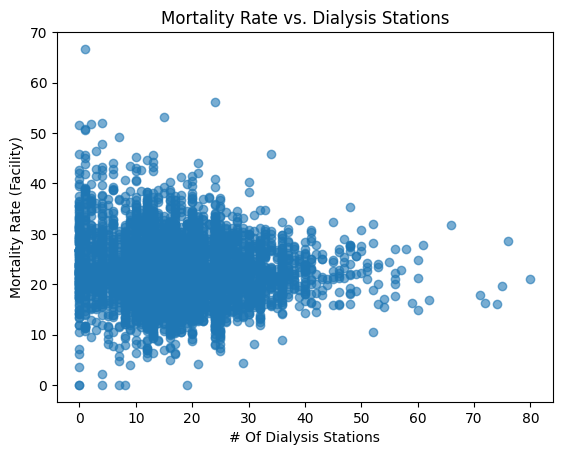

In [ ]:
x = work['# Of Dialysis Stations']
y = work['Mortality Rate (Facility)']

plt.figure()
plt.scatter(x, y, alpha=0.6)
plt.xlabel('# Of Dialysis Stations')
plt.ylabel('Mortality Rate (Facility)')
plt.title('Mortality Rate vs. Dialysis Stations')
plt.show()

## 6) Box Plot: Mortality Rates by Facility Type (Profit vs Non-profit)

/tmp/ipython-input-1790951932.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=sorted(cat.unique()), showfliers=False)


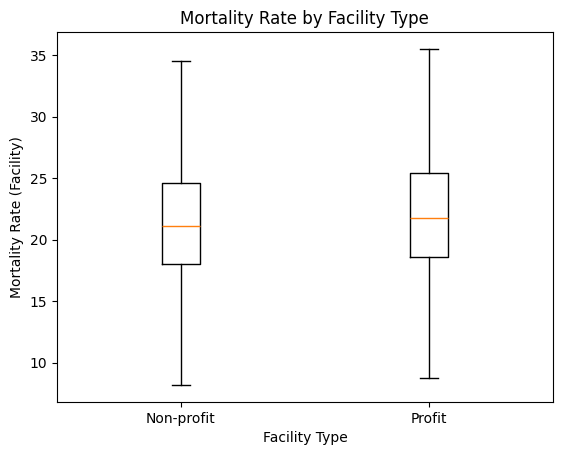

In [ ]:
if 'Profit or Non-Profit' in work.columns:

    cat = work['Profit or Non-Profit'].astype(str)
    mort = work['Mortality Rate (Facility)']
    groups = [mort[cat == k].dropna().values for k in sorted(cat.unique())]

    plt.figure()
    plt.boxplot(groups, labels=sorted(cat.unique()), showfliers=False)
    plt.xlabel('Facility Type')
    plt.ylabel('Mortality Rate (Facility)')
    plt.title('Mortality Rate by Facility Type')
    plt.show()
else:
    print("Column 'Profit or Non-Profit' not found.")

## 7) Mortality Rate with Confidence Interval

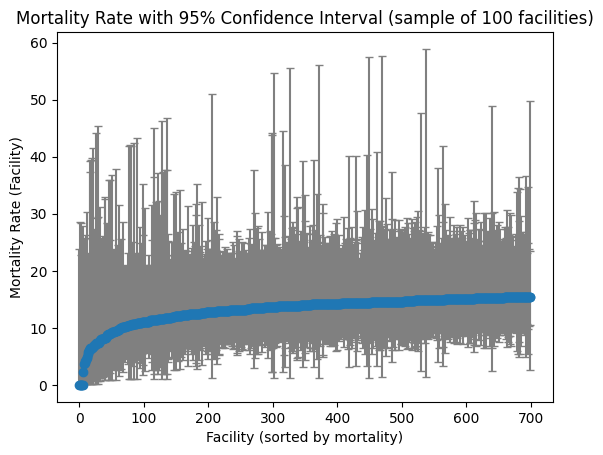

In [ ]:
plot_df = work[['Mortality Rate (Facility)',
                'Mortality Rate: Lower Confidence Limit (2.5%)',
                'Mortality Rate: Upper Confidence Limit (97.5%)']].dropna().copy()
plot_df = plot_df.sort_values('Mortality Rate (Facility)').head(700).reset_index(drop=True)

plt.figure()
plt.errorbar(
    x=range(len(plot_df)),
    y=plot_df['Mortality Rate (Facility)'],
    yerr=[plot_df['Mortality Rate (Facility)'] - plot_df['Mortality Rate: Lower Confidence Limit (2.5%)'],
          plot_df['Mortality Rate: Upper Confidence Limit (97.5%)'] - plot_df['Mortality Rate (Facility)']],
    fmt='o', ecolor='gray', capsize=3
)
plt.xlabel('Facility (sorted by mortality)')
plt.ylabel('Mortality Rate (Facility)')
plt.title('Mortality Rate with 95% Confidence Interval (sample of 100 facilities)')
plt.show()

## 8) Comparative Analysis: Transfusion Rate by State
We compare mean **Transfusion Rate (Facility)** across states.

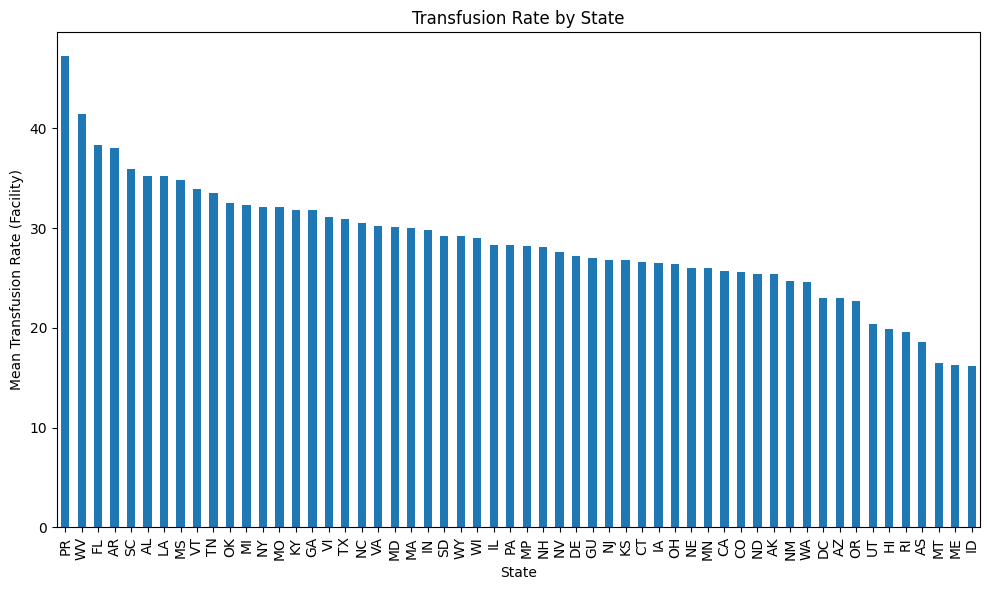

In [ ]:
if 'Transfusion Rate (Facility)' in work.columns:
    transf_by_state = (work.groupby('State')['Transfusion Rate (Facility)']
                       .mean()
                       .sort_values(ascending=False))

    plt.figure(figsize=(10, 6))
    transf_by_state.plot(kind='bar')
    plt.ylabel('Mean Transfusion Rate (Facility)')
    plt.title('Transfusion Rate by State')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Transfusion Rate (Facility)' not found.")

In [ ]:
out_path = 'state_efficiency_scores.csv'
state_scores.to_csv(out_path)
print(f"Saved: {out_path}")

Saved: state_efficiency_scores.csv
